In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
#convert them to lab using rgb2lab and then calculate similarity using deltaE_cie76
import os

The type of this input is <class 'numpy.ndarray'>
Shape: (182, 277, 3)


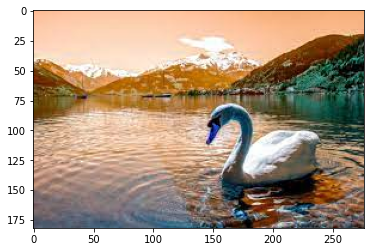

In [74]:
image = cv2.imread('me.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


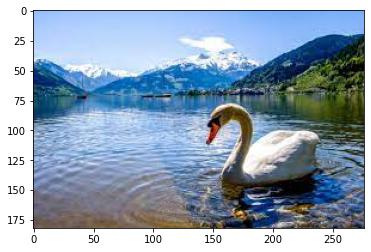

In [75]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
#The method cvtColor allows us to convert the image rendering to a 
#different color space. To move from BGR color space to RGB

In [8]:
#convert RGB to hex so that we can use them as labels for our pie chart.
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


In [9]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [10]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
#KMeans expects the input to be of two dimensions, so we use Numpy’s reshape function to reshape the image data

In [35]:
#KMeans algorithm creates clusters based on the supplied count of clusters. In our case, it will form clusters of colors and these clusters will be our top colors. 
# We then fit and predict on the same image to extract the prediction into the variable labels.
def get_colors (image, number_of_colors, show_chart):

    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    #resize does not change the data // reshape does
    #NTER_AREA uses pixel area relation for resampling. This is best suited for reducing the size of an image (shrinking)
    
    #modified_image = np.resize(image, (600*400 , 3))

    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)
    #Counter is a subclass of dict that's specially designed for counting hashable objects in Python.
    # It's a dictionary that stores objects as keys and counts as values

    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))

    center_colors = clf.cluster_centers_   #To find the colors/return the center of each cluster
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors


[array([129.44504184, 156.63729202, 191.77262749]),
 array([ 41.38578574, 114.07466653, 172.20888912]),
 array([158.88128925, 193.52093894, 242.08772793]),
 array([ 19.93921677,  60.19560506, 101.18895217]),
 array([32.38539668, 38.76639363, 23.26290662]),
 array([207.45438741, 224.90653545, 246.15227768]),
 array([87.09118097, 91.17735429, 77.26404924]),
 array([114.7321434 , 120.57217775, 133.33440672])]

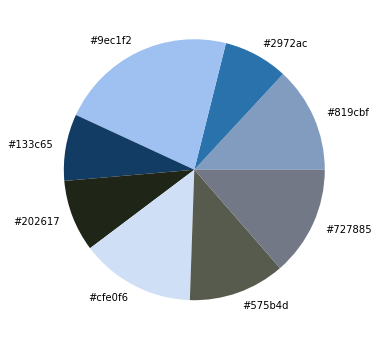

In [76]:
get_colors(get_image('me.jpg'), 8, True)

In [95]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [173,216,230],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    images.append(get_image(IMAGE_DIRECTORY+ "/"+ file))


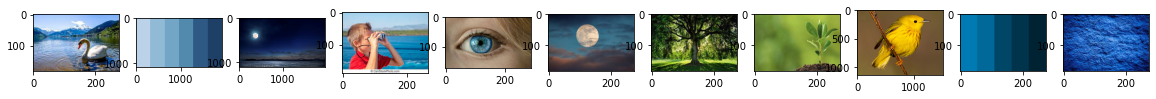

In [93]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [88]:
def match_image_by_color(image, color, threshold = 50, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    #convert the rgb colors to lab colors with (0≤L≤100 , −127≤a≤127, −127≤b≤127)
    #The Lab color space is quite different from the RGB color space. In RGB color space the color information is separated into
    # three channels but the same three channels also encode brightness information. On the other hand, in Lab color space, 
    # the L channel is independent of color information and encodes brightness only. The other two channels encode color.
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
    
    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        #finds the delta (basically difference) between the selected color and the color in iteration 
        #and if the delta is less than the threshold, the image is selected as matching with the color
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [89]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],color,threshold,colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

In [99]:
# Variable 'selected_color' can be any of COLORS['GREEN'], COLORS['BLUE'] or COLORS['YELLOW']
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 50, 5)